In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import kneighbors_graph
from sklearn import datasets,manifold
from scipy import sparse

In [18]:
def my_laplace(X,y,n_neighbors,n_component,i,j,normalize=False):
    m=X.shape[0]
    W = kneighbors_graph(X, n_neighbors,mode='distance')
    W=(W+W.T)*0.5
    D=sparse.diags(np.asarray(W.sum(axis=1)).flatten())
    if normalize==True:
        L=np.eye(m)-np.sqrt(sparse.linalg.inv(D))@W@np.sqrt(sparse.linalg.inv(D))
    else:
        L=D-W
    [yl,YL]=sparse.linalg.eigsh(L,k=n_component,which='SM')
    plt.figure(figsize=(9,8))
    plt.title('MNIST avec n_neighbors=3,n_component=3 normalize=True')
    plt.scatter(YL[:,i],YL[:,j],c=y,cmap=plt.cm.Set1)
    plt.savefig('my_mnist.jpg')
    plt.show()

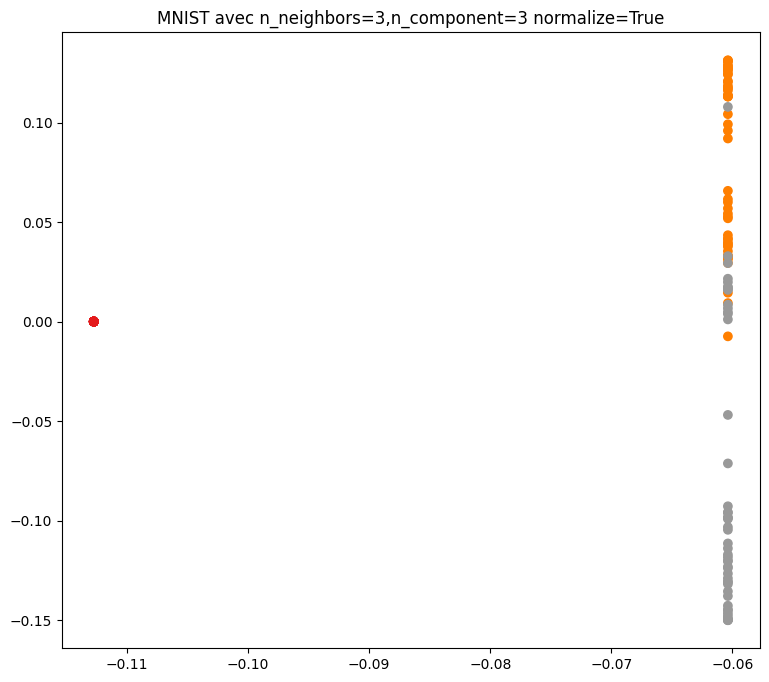

In [31]:
iris = datasets.load_iris()
y = iris.target
my_laplace(iris.data,y,8,3,1,2,False)

/home/souna/Bureau/Master/master1/myenv/.venv/lib/python3.12/site-packages/scipy/sparse/linalg/_matfuncs.py:76: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  Ainv = spsolve(A, I)
/home/souna/Bureau/Master/master1/myenv/.venv/lib/python3.12/site-packages/scipy/sparse/linalg/_matfuncs.py:76: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  Ainv = spsolve(A, I)
/home/souna/Bureau/Master/master1/myenv/.venv/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


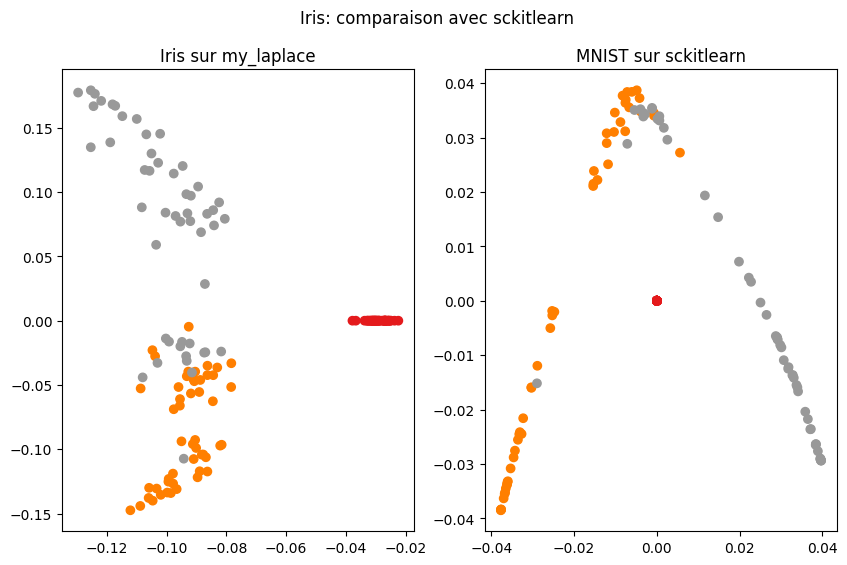

In [33]:
normalize=True
m=iris.data.shape[0]
plt.figure(figsize=(10,6))
W = kneighbors_graph(iris.data, 8,mode='distance')
W=(W+W.T)*0.5
D=sparse.diags(np.asarray(W.sum(axis=1)).flatten())
if normalize==True:
    L=np.eye(m)-np.sqrt(sparse.linalg.inv(D))@W@np.sqrt(sparse.linalg.inv(D))
else:
    L=D-W
[yl,YL]=sparse.linalg.eigsh(L,k=3,which='SM')
plt.subplot(1,2,1)
plt.suptitle('Iris: comparaison avec sckitlearn')
plt.title('Iris sur my_laplace')
plt.scatter(YL[:,1],YL[:,2],c=y,cmap=plt.cm.Set1)
#_______________
plt.subplot(1,2,2)
plt.title('MNIST sur sckitlearn')
model=manifold.SpectralEmbedding(n_components=3)
X_transformed = model.fit_transform(iris.data)
plt.scatter(X_transformed[:,1],X_transformed[:,2],c=y,cmap=plt.cm.Set1)
plt.savefig('iris_comp.jpg')
plt.show()

/home/souna/Bureau/Master/master1/myenv/.venv/lib/python3.12/site-packages/scipy/sparse/linalg/_matfuncs.py:76: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  Ainv = spsolve(A, I)
/home/souna/Bureau/Master/master1/myenv/.venv/lib/python3.12/site-packages/scipy/sparse/linalg/_matfuncs.py:76: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  Ainv = spsolve(A, I)


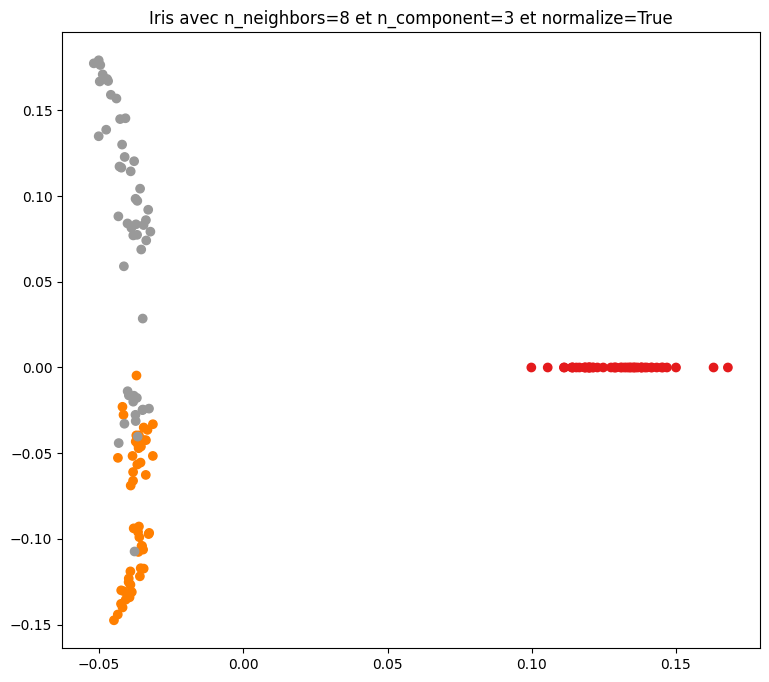

In [36]:
iris = datasets.load_iris()
y = iris.target
my_laplace(iris.data,y,8,3,1,2,True)

/home/souna/Bureau/Master/master1/myenv/.venv/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


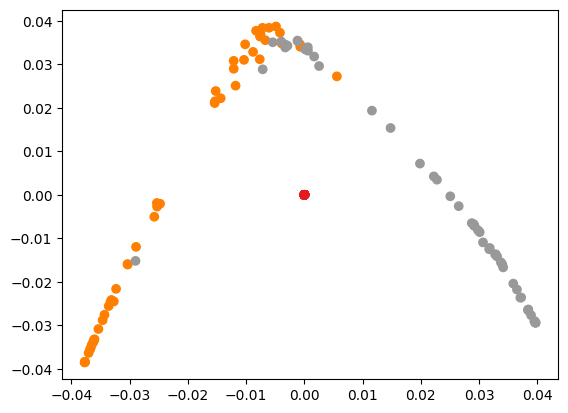

In [31]:
model=manifold.SpectralEmbedding(n_components=8)
X_transformed = model.fit_transform(iris.data)
plt.figure()
plt.scatter(X_transformed[:,1],X_transformed[:,2],c=y,cmap=plt.cm.Set1)

/home/souna/Bureau/Master/master1/myenv/.venv/lib/python3.12/site-packages/scipy/sparse/linalg/_matfuncs.py:76: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  Ainv = spsolve(A, I)
/home/souna/Bureau/Master/master1/myenv/.venv/lib/python3.12/site-packages/scipy/sparse/linalg/_matfuncs.py:76: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  Ainv = spsolve(A, I)


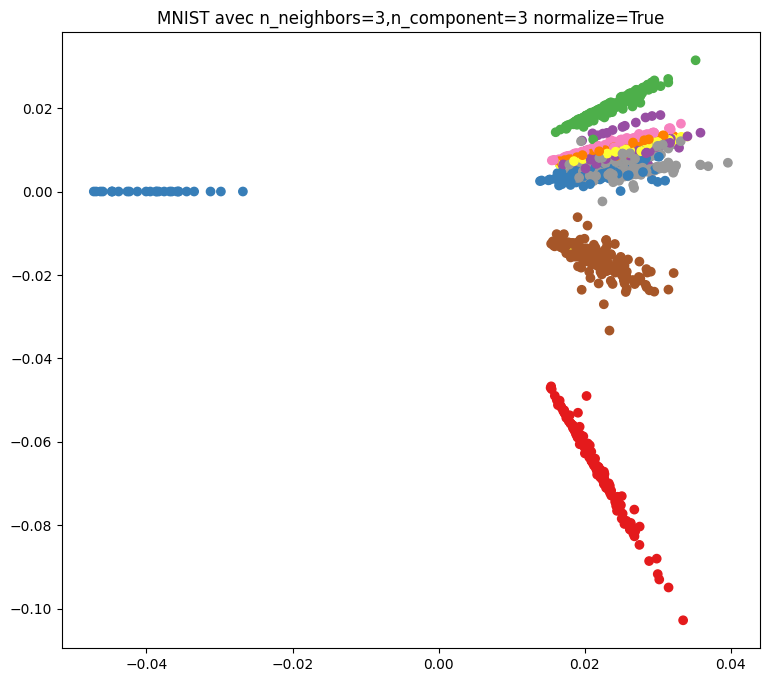

In [21]:
mnist = datasets.load_digits()
X_mnist = mnist.data
y_mnist = mnist.target
my_laplace(X_mnist,y_mnist,3,3,1,2,True)

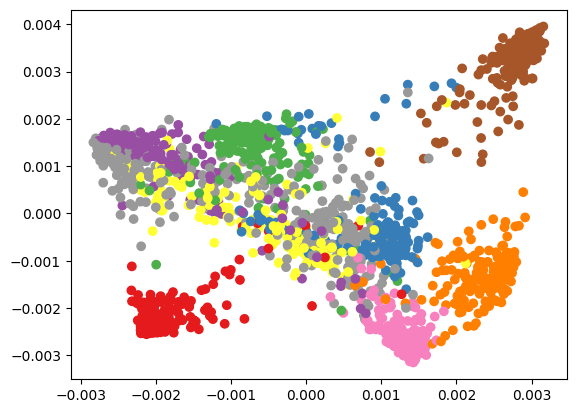

In [10]:
model=manifold.SpectralEmbedding(n_components=8)
X_transformed = model.fit_transform(X_mnist)
plt.figure()
plt.scatter(X_transformed[:,1],X_transformed[:,2],c=y_mnist,cmap=plt.cm.Set1)

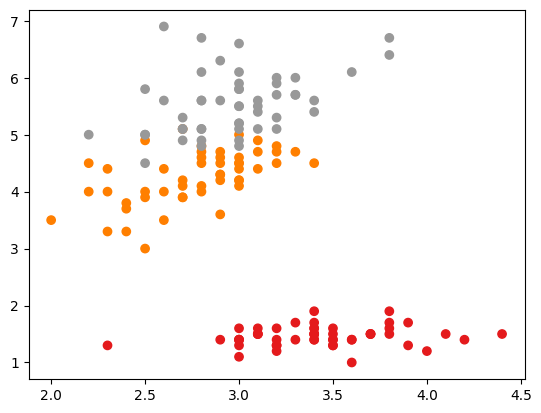

In [34]:
plt.scatter(iris.data[:,1],iris.data[:,2],c=y,cmap=plt.cm.Set1)